In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

users_data = pd.read_pickle("../data/users_data_final.pkl")

users_data.head(n = 10)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile
5,c6aee0d4-2a86-4bac-827b-c6d33b5933e6,2.0,231.0,35,management,married,tertiary,False,True,False,None,139,1,-1,0,None,False,2000-06-21,desktop
6,1fa7d4fb-3e4a-463a-ba4b-08f824945e45,2.0,447.0,28,management,single,tertiary,False,True,True,None,217,1,-1,0,None,False,1996-02-22,mobile
7,d20059f3-84b7-4ec5-b933-8bca3a3414af,1.0,2.0,42,entrepreneur,divorced,tertiary,True,True,False,None,380,1,-1,0,None,False,1991-12-09,mobile
8,0cedabc3-6141-43c6-988c-9ec2f14a8eb9,NaN,NaN,58,retired,married,primary,False,True,False,None,50,1,-1,0,None,False,1999-08-20,desktop
9,bc3d8e25-4619-4395-9aae-7d443f424802,2.0,593.0,43,technician,single,secondary,False,True,False,None,55,1,-1,0,None,False,1991-09-16,mobile


In [2]:
users_data.shape

(45209, 19)

In [3]:
print("# number of unique users:", len(users_data.user_id.unique()))

# number of unique users: 45209


In [4]:
print("# number of unique users:", users_data['user_id'].nunique())

# number of unique users: 45209


In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
# summary statistics

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# distribution of non numerical feature

users_data['job'].value_counts(dropna=False)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

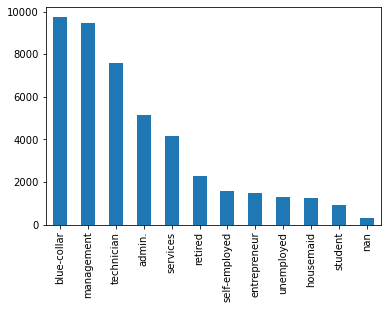

In [8]:
users_data['job'].value_counts(dropna=False).plot(kind='bar');

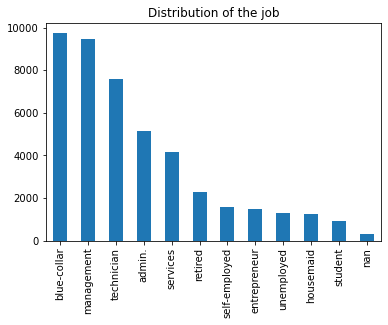

In [9]:
# visualize the data (use var to make it dynamic)

var = 'job'

users_data[var].value_counts(dropna = False).plot(kind='bar')
plt.title(f"Distribution of the {var}")
plt.show()

In [10]:
# identify features with low variance

users_data.std()

/var/folders/8j/7n34843d16760smbwy7x_sxw0000gn/T/ipykernel_1583/2995689993.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  users_data.std()


number_transactions                        3.814329
total_amount_usd                        3063.412688
age                                       10.618653
default                                    0.133052
housing                                     0.49688
loan                                       0.366827
duration                                 257.525446
campaign                                   3.098076
pdays                                    100.130586
previous                                   2.303489
term_deposit                               0.321412
date_joined            2420 days 10:04:20.364896480
dtype: object

- default variable as lowest std

In [11]:
# look at the distribution of defaut (because it is a low variance feature)

users_data['default'].value_counts(normalize=True)

False    0.981973
True     0.018027
Name: default, dtype: float64

In [12]:
# look at correlations between the data (put inside a variable so we can use for plotting)

corr_matrix = users_data.corr()

corr_matrix

# did not identify features with high correlations, not need to do feature engineering

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
...,...,...,...,...,...,...,...,...,...,...,...
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


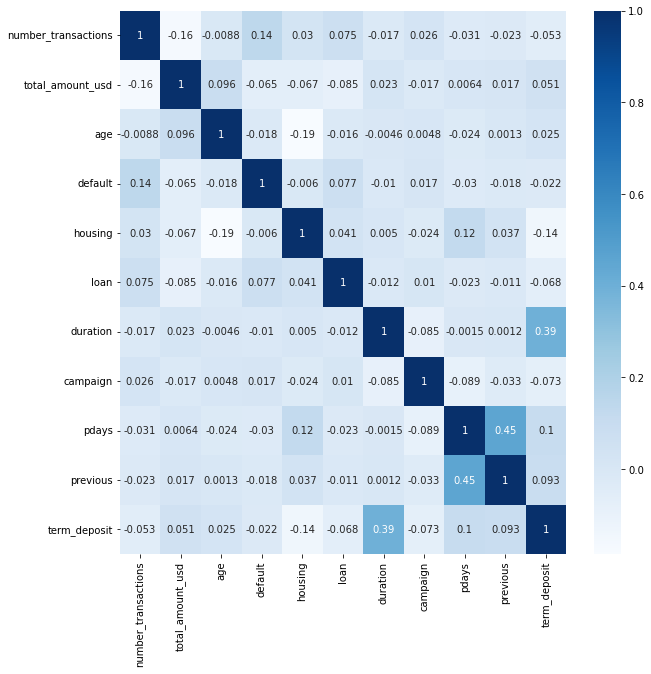

In [13]:
# plot using heatmap

fig = plt.figure(figsize = (10, 10))

sns.heatmap(corr_matrix,
           cmap = 'Blues',
           annot = True)

plt.show()

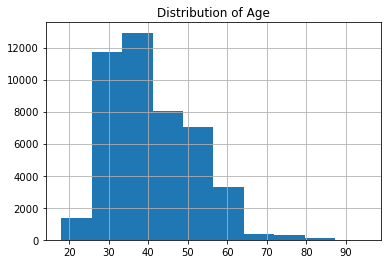

In [14]:
# explore the distribution of numerical data

users_data['age'].hist()

plt.title('Distribution of Age')

plt.show()

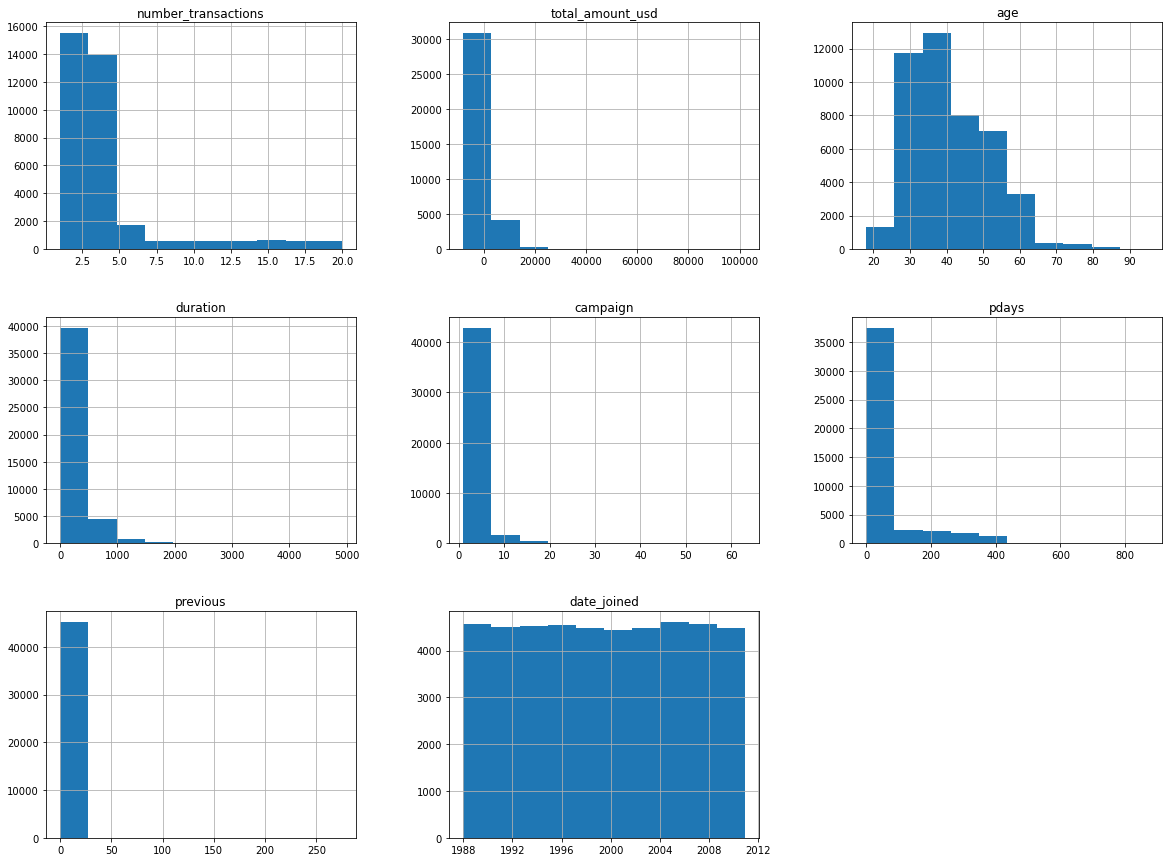

In [15]:
users_data.hist(figsize = (20, 15))

plt.show()

- All the features are skewed, we noticed one feature with low variance (default) that we need to drop

In [16]:
users_data.head(5)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


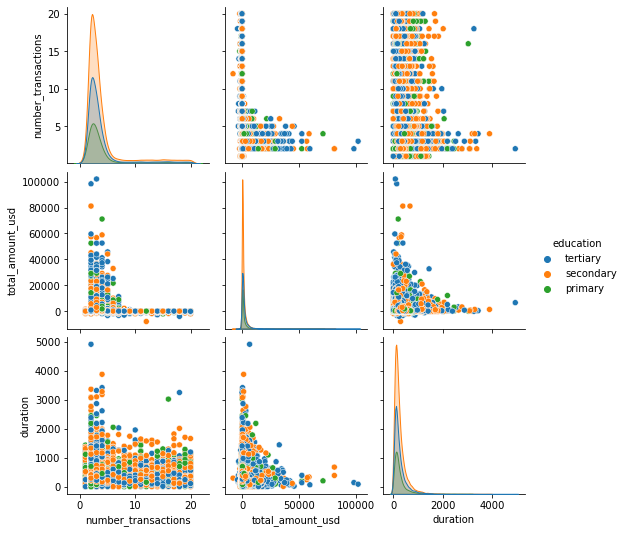

In [17]:
sample = users_data[['number_transactions', 'total_amount_usd', 'duration', 'education']]

sns.pairplot(sample, hue='education');

In [18]:
users_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [19]:
# mode of age

users_data['age'].mode()

# since median, mean and mode are not equal this is not normally distributed and may require Logarithmic Transformation

0    32
dtype: int64

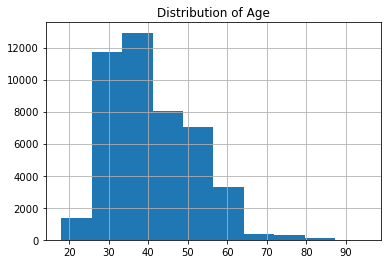

In [20]:
users_data['age'].hist()

plt.title('Distribution of Age')

plt.show()

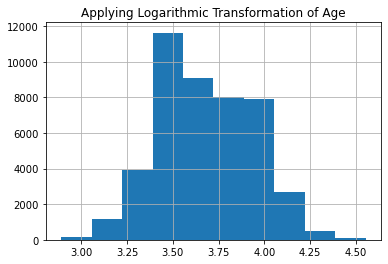

In [21]:
# Apply Logarithmic Transformation of Age

np.log(users_data['age']).hist()

plt.title("Applying Logarithmic Transformation of Age");

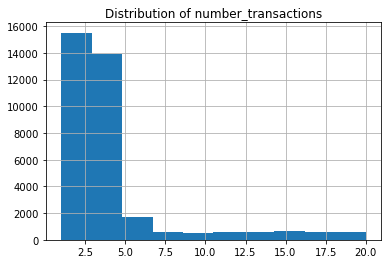

In [22]:
users_data['number_transactions'].hist()

plt.title('Distribution of number_transactions')

plt.show()

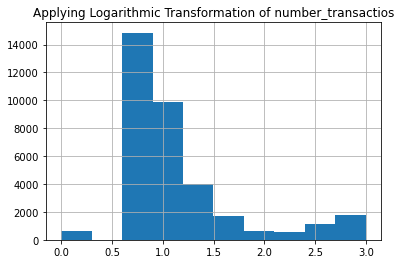

In [23]:
# Apply Logarithmic Transformation of number_transactios

np.log(users_data['number_transactions']).hist()

plt.title("Applying Logarithmic Transformation of number_transactios");

In [24]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

## From here 

In [25]:
# how many categories does each feature have, which data type object ?

users_data.select_dtypes(['object'])

,user_id,job,marital,education,contact,poutcome,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,management,married,tertiary,None,None,mobile
1,bb92765a-08de-4963-b432-496524b39157,technician,single,secondary,None,None,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,entrepreneur,married,secondary,None,None,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,blue-collar,married,None,None,None,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,None,single,None,None,None,mobile
...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,technician,married,tertiary,cellular,None,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,retired,divorced,primary,cellular,None,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,retired,married,secondary,cellular,success,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,blue-collar,married,secondary,telephone,None,desktop


In [26]:
categorical_columns = list(users_data.select_dtypes(['object']).columns)
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [27]:
len(categorical_columns)

7

In [28]:
for c in categorical_columns:
    print(c)
    print(len(users_data[c].unique()))

user_id
45209
job
12
marital
3
education
4
contact
3
poutcome
4
device
4


In [29]:
cat_df = []

for c in categorical_columns:
    cat_df.append({"categorical_features_name":c,
                  "count": (len(users_data[c].unique()))
                  })
    
pd.DataFrame(cat_df)

,categorical_features_name,count
0,user_id,45209
1,job,12
2,marital,3
3,education,4
4,contact,3
5,poutcome,4
6,device,4


## To here -  Can be done in one function as shown below

# Funciton to identify the number of categories of every categorical feature 

In [30]:
def identify_number_categories(df):
    """
    This definition can be used to identify the number of categories of every categorical feature 
    
    @param df DataFrame 
    
    @return a DataFrame with the categorical features and number of categories"""

    categorical_columns = list(df.select_dtypes(['object']).columns)

    cat_df = []

    for c in categorical_columns:
        cat_df.append({"categorical_feature": c,
                       "number_categories": len(df[c].value_counts(dropna = False))
                    })
        
    return pd.DataFrame(cat_df).sort_values(by = "number_categories", ascending = False)

In [31]:
# Dataframe that 
identify_number_categories(users_data)

,categorical_feature,number_categories
0,user_id,45209
1,job,12
3,education,4
5,poutcome,4
6,device,4
2,marital,3
4,contact,3


In [32]:
# identify missing data

users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [33]:
users_data.isnull().mean()

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

# Function to identify missing data

In [34]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [35]:
identify_missing_data(users_data)

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
...,...,...,...
14,housing,0.00,bool
15,default,0.00,bool
16,marital,0.00,object
17,age,0.00,int64


In [36]:
# store it in variable so that we can filter for percent_missing greater that 0

missing_value_df = identify_missing_data(users_data)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


# Feature engineering

In [37]:
# identify rows where date_joined has missing data, and remove these rows

# data where date_joined is missing
users_data[users_data['date_joined'].isnull()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
1832,a8efc367-e7bc-4ddf-a075-ab6a850c5be1,2.0,10.0,40,blue-collar,married,secondary,False,True,False,None,1692,2,-1,0,None,True,NaT,desktop
1970,e287579c-0eb5-4da0-a697-a92e6a024c47,6.0,391.0,34,admin.,single,secondary,False,True,False,None,192,2,-1,0,None,False,NaT,mobile
8033,9e6d7f37-fec1-4967-9281-d37eb69fc211,4.0,691.0,34,technician,married,tertiary,False,True,True,None,70,1,-1,0,None,False,NaT,mobile
11292,e380ff78-00d5-4f4d-93a3-db991ff0ca3b,3.0,2769.0,41,services,divorced,secondary,False,True,False,None,96,3,-1,0,None,False,NaT,mobile
12439,d64a3876-1dc0-480e-b13e-c4b89639b6d2,5.0,0.0,57,retired,married,secondary,False,False,True,None,104,2,-1,0,None,False,NaT,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,8aa406ed-8eab-42d0-9344-e36f24fe1ba8,NaN,NaN,28,self-employed,single,tertiary,False,True,False,cellular,245,3,-1,0,None,False,NaT,mobile
36429,44e9aa39-8d85-44a2-8c2a-2d76c8af6263,2.0,271.0,32,technician,single,secondary,False,True,True,cellular,271,2,-1,0,None,False,NaT,mobile
37749,744782e8-8b61-4974-9d6b-2f7061a3d37b,2.0,1880.0,41,blue-collar,single,secondary,False,False,True,cellular,35,1,356,10,other,False,NaT,mobile
40661,26155934-f13d-4a27-adf0-c750acc19569,2.0,1624.0,53,management,married,tertiary,False,False,False,cellular,107,1,98,6,success,True,NaT,desktop


In [38]:
# check the number of rows we need to drop

print("# of rows where data is missing:",
      users_data[users_data['date_joined'].isnull()].shape[0])

# of rows where data is missing: 30


In [39]:
# drop rows where data_joined is missing
# the tilda sign means identify rows where date_joined is not null

users_data_cleaned = users_data[~users_data['date_joined'].isnull()]
users_data_cleaned.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [40]:
# date_joined has now disapeared
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.11,float64
3,number_transactions,22.11,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object


In [41]:
# drop features where we have more than 60% missing data

users_data_cleaned = users_data_cleaned.drop(['poutcome'], axis=1)


In [42]:
# poutcome has now disapeared

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,contact,28.80,object
1,total_amount_usd,22.11,float64
2,number_transactions,22.11,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object


In [43]:
users_data_cleaned['contact'].value_counts(dropna = False)

cellular     29262
NaN          13013
telephone     2904
Name: contact, dtype: int64

In [44]:
# replace NAs in contact with "not contacted"

users_data_cleaned['contact'].fillna("not contacted", inplace=True)

In [45]:
# NAs in contact have now been replaced

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,total_amount_usd,22.11,float64
1,number_transactions,22.11,float64
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object


In [46]:
# replace the nas in total_amount_usd to the mean of total_amount_usd

users_data_cleaned['total_amount_usd'].fillna(users_data_cleaned['total_amount_usd'].mean,
                                              inplace=True)

In [47]:
# NAs in total_amount_usd have now been replaced

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,number_transactions,22.11,float64
1,education,4.11,object
2,job,0.64,object
3,device,0.21,object


In [48]:
# replace the nas in number_transactions to the mean of number_transactions

users_data_cleaned['number_transactions'].fillna(users_data_cleaned['number_transactions'].mean,
                                              inplace=True)

In [49]:
# NAs in number_transactions have now been replaced

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,education,4.11,object
1,job,0.64,object
2,device,0.21,object


In [50]:
# Replace all remaining features with data types object with Unknown

users_data_cleaned['education'].fillna('Unknown', inplace=True)
users_data_cleaned['job'].fillna('Unknown', inplace=True)
users_data_cleaned['device'].fillna('Unknown', inplace=True)

In [51]:
# All remaining NAs have now been replaced

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type


# identify and remove outliers
#### Visualize the features


In [62]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

### different ways to make a boxplot below

<AxesSubplot:>

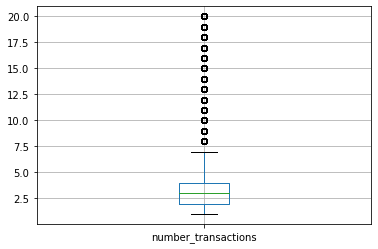

In [64]:
numeric_col = ['number_transactions']

users_data.boxplot(numeric_col)

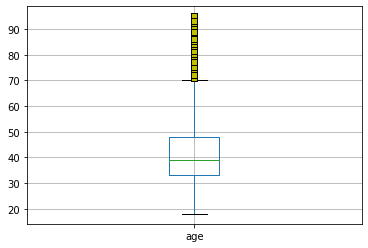

In [66]:
boxplot = users_data.boxplot(
    column=['age'],
    flierprops=dict(markerfacecolor='y', marker='s', label='not shown'))

plt.show()

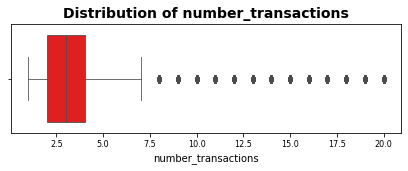

In [69]:
##### Can look at the boxplot of a specific variable

plt.figure(figsize=(7, 2))
sns.boxplot(x=users_data['number_transactions'], color='red', linewidth=0.8)
plt.tick_params(labelsize=8, rotation=0)
plt.title('Distribution of number_transactions', size=14, weight='bold')
plt.show()

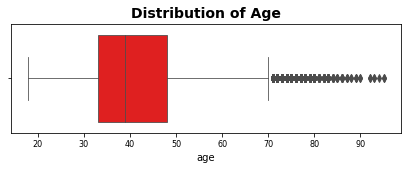

In [54]:
##### Can look at the boxplot of a specific variable

plt.figure(figsize=(7, 2))
sns.boxplot(x=users_data['age'], color='red', linewidth=0.8)
plt.tick_params(labelsize=8, rotation=0)
plt.title('Distribution of Age', size=14, weight='bold')
plt.show()

#### Violin plot

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


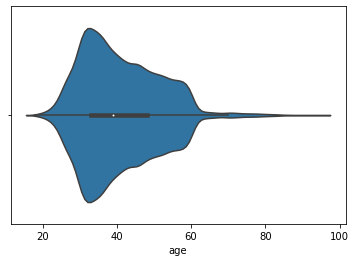

In [55]:
# we could also look at the weight variable as violin plot - combines the distribution and the boxplot

sns.violinplot(users_data['age']);

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


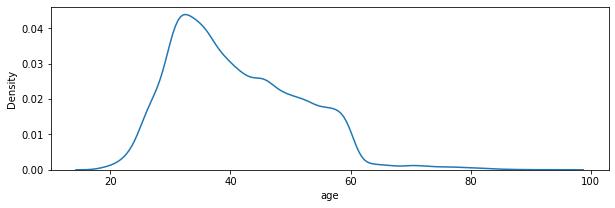

In [56]:
# we could also just look at the kernel distribution estimate dist plot

plt.figure(figsize=(10, 3))
sns.distplot(users_data['age'], hist=False);

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


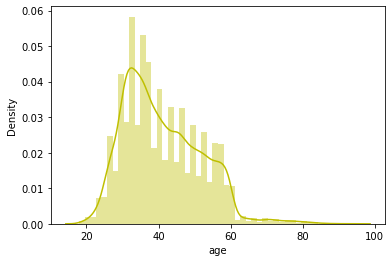

In [57]:
sns.distplot(users_data['age'], color="y");

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


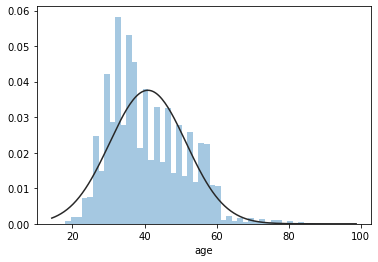

In [58]:
# if you want to replace the kde with a normal distribution

from scipy.stats import norm

sns.distplot(users_data['age'], fit=norm, kde=False);

# Class for identifying outliers in data, and removal of outliers.


In [59]:
from matplotlib import rcParams

class RemoveOutliers(object):
    
    def __init__(self, data):
        self.input_data = data
        self.numerical_cols = list(self.input_data.select_dtypes(include=['int64', 'float64']))

    def outliers(self, var):
        q1, q3 = np.percentile(self.input_data[var], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)

        return lower_bound, upper_bound
    
    def outliers_summary(self, users_data):
        """data frame to summarise outliers for a sense check"""
        results = []
        for i in self.numerical_cols:
            lower_bound, upper_bound = self.outliers(i)
            results.append({'var_name': i,
                            'max': self.input_data[i].max(),
                            'upper bound': upper_bound,
                            '# of contents above upper bound': len(self.input_data[self.input_data[i] > upper_bound]),
                            'min': self.input_data[i].min(),
                            'lower bound': lower_bound,
                            '# of contents below lower bound': len(self.input_data[self.input_data[i] < lower_bound]),
                            })
        result_df = pd.DataFrame(data=results)
        result_df = result_df[['var_name',
                               'max',
                               'upper bound',
                               '# of contents above upper bound',
                               'min',
                               'lower bound',
                               '# of contents below lower bound']].sort_values(['# of contents above upper bound'], ascending=False)
        print('Summary of Outliers')

        return result_df

In [60]:
A = RemoveOutliers(users_data)
A.outliers_summary(users_data)

Summary of Outliers


,var_name,max,upper bound,# of contents above upper bound,min,lower bound,# of contents below lower bound
5,pdays,871.0,-1.0,8257,-1.0,-1.0,0
6,previous,275.0,0.0,8257,0.0,0.0,0
3,duration,4918.0,643.0,3234,0.0,-221.0,0
4,campaign,63.0,6.0,3064,1.0,-2.0,0
2,age,95.0,70.5,487,18.0,10.5,0
0,number_transactions,20.0,NaN,0,1.0,NaN,0
1,total_amount_usd,102127.0,NaN,0,-8019.0,NaN,0


# function to identify highly correlated features

# function to identify features with low varaince

In [61]:
list(users_data.select_dtypes(['object']).columns)

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']